<a href="https://colab.research.google.com/github/thetestcoder/ml-projects/blob/main/ML_6_Tata_Power_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import file
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/thetestcoder/ml-datasets/main/tata-power-stock-price-2006-2023.csv")


In [2]:
df.head()

,Date,Price,Open,High,Low,Volume,Change(%)
0,4-Aug-23,235.65,237.00,237.35,234.50,7710303,0.08%
1,3-Aug-23,235.45,235.25,237.60,232.55,10784942,-0.13%
2,2-Aug-23,235.75,244.70,244.70,233.30,22636262,-3.54%
3,1-Aug-23,244.40,237.40,245.40,236.25,27535144,3.25%
4,31-Jul-23,236.70,236.55,238.90,235.20,18682254,0.87%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4236 non-null   object 
 1   Price      4236 non-null   float64
 2   Open       4236 non-null   float64
 3   High       4236 non-null   float64
 4   Low        4236 non-null   float64
 5   Volume     4236 non-null   int64  
 6   Change(%)  4236 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 231.8+ KB


In [4]:
df.describe()

,Price,Open,High,Low,Volume
count,4236.000000,4236.000000,4236.000000,4236.000000,4.236000e+03
mean,101.557904,101.707394,103.341251,99.869016,8.714790e+06
std,48.552574,48.645749,49.262630,47.913587,1.887371e+07
min,27.300000,27.250000,28.600000,27.000000,5.448000e+03
25%,71.092500,71.350000,72.500000,69.960000,7.056415e+05
50%,86.225000,86.500000,87.875000,84.690000,3.265186e+06
75%,120.850000,120.642500,123.032500,118.445000,7.508316e+06
max,289.800000,292.350000,298.050000,280.350000,3.606618e+08


In [5]:
df.tail()

,Date,Price,Open,High,Low,Volume,Change(%)
4231,10-Jul-06,46.12,45.84,46.37,44.88,245519,0.96%
4232,7-Jul-06,45.68,45.82,46.31,45.27,464259,-1.15%
4233,6-Jul-06,46.21,46.03,46.56,45.37,298667,-0.37%
4234,5-Jul-06,46.38,45.84,46.77,44.49,460514,2.61%
4235,4-Jul-06,45.20,46.42,47.04,44.98,163255,-2.88%


In [6]:
#preprocess data

df['Date'] = pd.to_datetime(df['Date'])

df['Change(%)'] = df['Change(%)'].str.rstrip('%').astype(float)

df.set_index('Date', inplace=True)

y = df['Price'].values

In [7]:
df.head()

,Price,Open,High,Low,Volume,Change(%)
Date,,,,,,
2023-08-04,235.65,237.00,237.35,234.50,7710303,0.08
2023-08-03,235.45,235.25,237.60,232.55,10784942,-0.13
2023-08-02,235.75,244.70,244.70,233.30,22636262,-3.54
2023-08-01,244.40,237.40,245.40,236.25,27535144,3.25
2023-07-31,236.70,236.55,238.90,235.20,18682254,0.87


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [9]:
#spliting data
train_size = int(len(y_scaled) * 0.8)  # 80% for training
train_data, test_data = y_scaled[:train_size], y_scaled[train_size:]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import numpy as np
import matplotlib.pyplot as plt

p = 5

# Prepare the input features (X) and target labels (y) for training
X_train, y_train = [], []
for i in range(p, len(train_data)):
    X_train.append(train_data[i - p:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Function to create the LSTM model
def create_lstm_model(units=50):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Create a KerasRegressor with the LSTM model
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)

# Define the hyperparameters to search
param_grid = {'units': [50, 100, 150],
              'epochs': [50, 100, 150],
              'batch_size': [32, 64, 128]}

# Perform Grid Search using 5-fold cross-validation
grid_search = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_result = grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding MAPE
print("Best Parameters: ", grid_search_result.best_params_)
print("Best MAPE: ", -grid_search_result.best_score_)

# Use the best model for predictions
best_model = grid_search_result.best_estimator_.model

<ipython-input-10-137fc90ae40e>:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_regressor = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters:  {'batch_size': 32, 'epochs': 100, 'units': 150}
Best MAPE:  9.721038804855198e-05


27/27 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error (MAPE): 44.28%


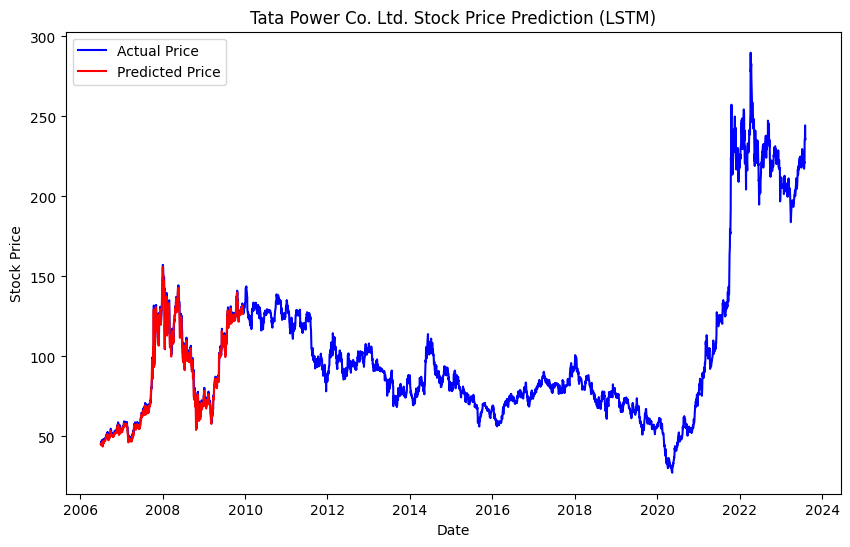

In [11]:
# Prepare the input features (X) for forecasting
X_test = []
for i in range(len(train_data) - p, len(train_data) + len(test_data)):
    X_test.append(y_scaled[i - p:i])
X_test = np.array(X_test)

# Reshape the input features for forecasting
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions on the testing data
predictions = best_model.predict(X_test)

# Inverse transform the predictions to get the original scale
predictions = scaler.inverse_transform(predictions).flatten()

# Convert predictions to a DataFrame with Date index for easy comparison
predicted_data = pd.DataFrame(predictions, columns=['Predicted Price'], index=df.index[-len(predictions):])

# Calculate the Mean Absolute Percentage Error (MAPE) for evaluation
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_test = scaler.inverse_transform(y_scaled[-len(predictions):])
mape_value = mape(y_test, predicted_data['Predicted Price'].values)

print(f"Mean Absolute Percentage Error (MAPE): {mape_value:.2f}%")

# Plot the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], label='Actual Price', color='blue')
plt.plot(predicted_data['Predicted Price'], label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Tata Power Co. Ltd. Stock Price Prediction (LSTM)')
plt.legend()
plt.show()
